In [44]:
import pandas as pd
import numpy as np

df=pd.read_csv('/Users/nishaankr/Desktop/Git/MSDSM/Exoplanet Habitability/Data/phl_exoplanet_catalog_2019.csv')


In [45]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [46]:
df.tail()


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38,0.15,0.16,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75,0.23,0.23,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500
4047,GJ 1061 d,3.0,1.68,0.24,0.25,NaN,NaN,NaN,2019,9/3/19,...,1,Warm,1,0.798200,Horologium,Hor,Pendulum Clock,1.164989,1.680000,0.05400


In [47]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


#Cleaning DATA and removing columns with excessive missing data

In [48]:
print(df.isnull().sum())

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


<Axes: >

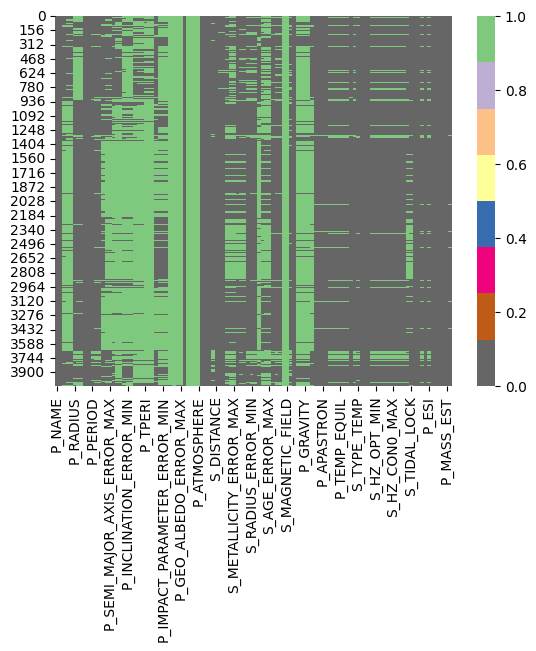

In [49]:
#`visualizing missing data

import seaborn as sns
sns.heatmap(df.isnull(), cmap='Accent_r')

In [50]:
#total number of examples
count = df.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(60)

,Count,%
P_DETECTION_MASS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_ATMOSPHERE,4048,100.000000
P_ALT_NAMES,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO_ERROR_MIN,4043,99.876482
P_TEMP_MEASURED,4043,99.876482
P_GEO_ALBEDO_ERROR_MAX,4043,99.876482


In [51]:
#drop the columns (Breakpoint is 40% missing values)
dataset_cols_dropped = df.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',\
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES', \
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',\
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', \
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY', \
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA', \
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',\
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE', \
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN', \
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX',\
'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX', \
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'], \

axis = 1)

In [52]:
dataset_cols_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   float64
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4048 non-null   int64  
 6   P_UPDATED                4048 non-null   object 
 7   P_PERIOD                 3938 non-null   float64
 8   P_PERIOD_ERROR_MIN       3807 non-null   float64
 9   P_PERIOD_ERROR_MAX       3807 non-null   float64
 10  P_DETECTION              4048 non-null   object 
 11  S_NAME                   4048 non-null   object 
 12  S_RA                     4048 non-null   float64
 13  S_DEC                    4048 non-null   float64
 14  S_MAG                   

In [53]:
#print categorical features

dataset_cols_dropped.select_dtypes(include = ['object']).columns


Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_ALT_NAMES', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [54]:
#Single the missing data out - categorical features

#Put the categorial columns in the object_cols
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

#Print the percentage of each column which belongs to the missing data
count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


Mode Imputaiton to fill empty object data

In [55]:
#Fill in the missing data in categorical columns using mode

dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP']\
.fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].\
fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna\
(dataset_cols_dropped['P_TYPE'].mode()[0])

In [56]:
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_NAME,0,0.0
P_UPDATED,0,0.0
P_DETECTION,0,0.0
S_NAME,0,0.0
S_ALT_NAMES,0,0.0
P_TYPE,0,0.0
S_TYPE_TEMP,0,0.0
S_RA_T,0,0.0
S_DEC_T,0,0.0
P_TYPE_TEMP,0,0.0


In [57]:
#Convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}

#Encode each member of encoders dictionary
for col in dataset_cols_dropped.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    dataset_cols_dropped[col] = encoders[col].fit_transform(dataset_cols_dropped[col])

Inputting data

In [58]:
#Impute in the missing data with MICE 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
imputed_data = dataset_cols_dropped.copy(deep = True) 

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)

imputed_data.head(6)

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,4.798394,-0.433561,0.608125,2007,0,326.03000,-0.32,0.32,...,0,1,0,0.083813,24,24,5,12.082709,6165.86330,1.29
1,1,3.0,4.798394,-0.433561,0.608125,2009,146,516.21997,-3.20,3.20,...,0,1,0,0.082414,83,83,42,12.229641,4684.78480,1.53
2,2,3.0,4.798394,-0.433561,0.608125,2008,0,185.84000,-0.23,0.23,...,0,1,0,0.081917,0,0,2,12.848516,1525.57440,0.83
3,3,3.0,4.798394,-0.433561,0.608125,2002,146,1773.40000,-2.50,2.50,...,0,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93
4,4,3.0,4.798394,-0.433561,0.608125,1996,146,798.50000,-1.00,1.00,...,1,2,0,0.368627,30,30,75,13.421749,565.73385,1.66
5,5,3.0,4.798394,-0.433561,0.608125,2008,0,993.30000,-3.20,3.20,...,0,1,0,0.216174,31,31,22,12.424038,3273.62840,2.60


In [59]:
#Print the number of missing values in Mice_temp_data 
imputed_data.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 71, dtype: int64

Checking in P_HABITABLE if the classes are balanced

In [60]:
#Class distribution before sampling
from collections import Counter
counter_ = Counter(imputed_data['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(imputed_data['P_HABITABLE']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

Class=0, n=3993 (98.641%)
Class=2, n=34 (0.840%)
Class=1, n=21 (0.519%)


Synthetic minority oversampling technique - SMOTE and Edited Nearest Neighbour 





In [61]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = imputed_data.drop(['P_HABITABLE'], axis = 1), imputed_data.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)

#The distribution after applying SMOTEENN  
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n=3843 (32.925%)
Class=1, n=3993 (34.210%)
Class=2, n=3836 (32.865%)


The output shows that the classes “conservatively habitable” (represented by 1 in P_HABITABLE), and “optimistically habitable” (represented by 2 in P_HABITABLE), which were the minority classes, now are oversampled and have a much larger number of examples; on the other hand, the majority class “inhabitable” (represented by 0) also has less number of examples as before. This output illustrates that our dataset is successfully balanced.

In [62]:
#concatenate X and y into a new dataset
sampled_data = X
sampled_data['P_HABITABLE'] = y

In [63]:
sampled_data.shape

(11672, 71)

In [64]:
sampled_data.head()


,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_HABITABLE
0,0,3.0,4.798394,-0.433561,0.608125,2007,0,326.03000,-0.32,0.32,...,0,1,0.083813,24,24,5,12.082709,6165.86330,1.29,0
1,1,3.0,4.798394,-0.433561,0.608125,2009,146,516.21997,-3.20,3.20,...,0,1,0.082414,83,83,42,12.229641,4684.78480,1.53,0
2,2,3.0,4.798394,-0.433561,0.608125,2008,0,185.84000,-0.23,0.23,...,0,1,0.081917,0,0,2,12.848516,1525.57440,0.83,0
3,3,3.0,4.798394,-0.433561,0.608125,2002,146,1773.40000,-2.50,2.50,...,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93,0
4,4,3.0,4.798394,-0.433561,0.608125,1996,146,798.50000,-1.00,1.00,...,1,2,0.368627,30,30,75,13.421749,565.73385,1.66,0


Detecting Multi-Colliniearity

In [65]:
#Correlation Analysis
correlation_mat = sampled_data.corr().abs()
print (correlation_mat)

                         P_NAME  P_STATUS  P_RADIUS  P_RADIUS_ERROR_MIN  \
P_NAME                 1.000000       NaN  0.028241            0.004421   
P_STATUS                    NaN       NaN       NaN                 NaN   
P_RADIUS               0.028241       NaN  1.000000            0.975948   
P_RADIUS_ERROR_MIN     0.004421       NaN  0.975948            1.000000   
P_RADIUS_ERROR_MAX     0.040641       NaN  0.697528            0.795348   
...                         ...       ...       ...                 ...   
S_CONSTELLATION_ENG    0.130099       NaN  0.016089            0.006029   
P_RADIUS_EST           0.123144       NaN  0.006972            0.098204   
P_MASS_EST             0.085282       NaN  0.017135            0.052382   
P_SEMI_MAJOR_AXIS_EST  0.010595       NaN  0.002142            0.006444   
P_HABITABLE            0.044688       NaN  0.000982            0.043053   

                       P_RADIUS_ERROR_MAX    P_YEAR  P_UPDATED  P_PERIOD  \
P_NAME                 

<Axes: >

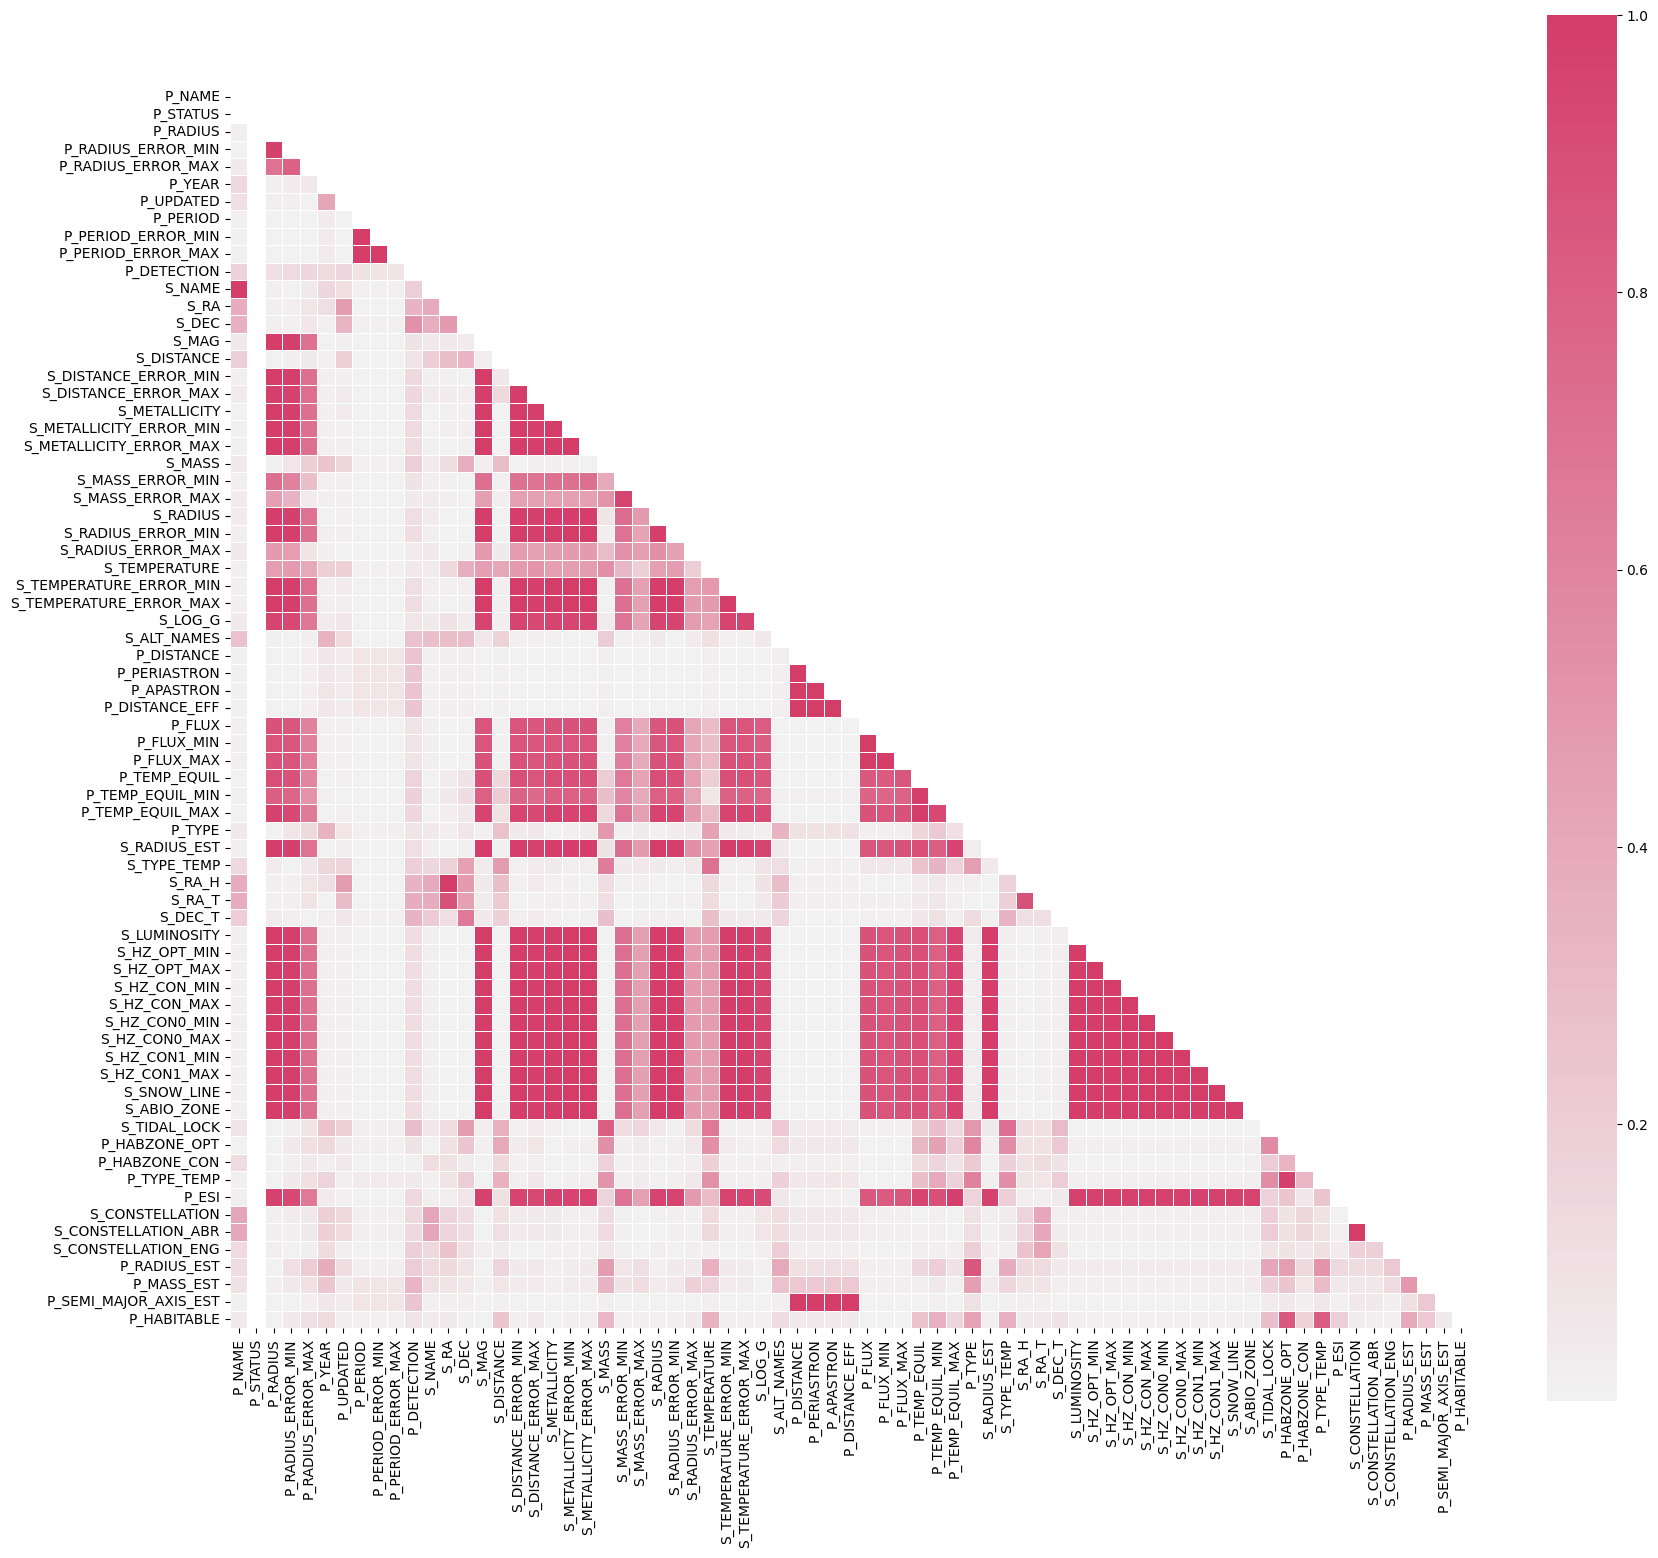

In [66]:
#the correlation matrix 
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

Find out the columns which need to be dropped (Correlaation > 95%):

In [67]:
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

#Set up an array of the columns to be dropped (correlation greater than 95%)
to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

#Print the list of the columns to be dropped
print(to_drop)


['P_RADIUS_ERROR_MIN', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_RADIUS_ERROR_MIN', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST']


Dropping the Columns with correlation higher than 95%

In [68]:
preprocessed_data = sampled_data.drop(['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',\
'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN',\
'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',\
'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN',\
'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF',\
'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',\
'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',\
'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',\
'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis = 1)
preprocessed_data.head()

#preprocessed_data.shape

,P_NAME,P_STATUS,P_RADIUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_RA,S_DEC,S_DISTANCE,...,S_RA_T,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_HABITABLE
0,0,3.0,4.798394,2007,0,326.03000,7,185.17928,17.792868,93.37,...,687,259,0.642400,0,0,24,5,12.082709,6165.86330,0
1,1,3.0,4.798394,2009,146,516.21997,7,229.27454,71.823898,125.72,...,847,2236,0.648683,0,0,83,42,12.229641,4684.78480,0
2,2,3.0,4.798394,2008,0,185.84000,7,352.82257,39.236198,75.59,...,2982,611,0.600010,0,0,0,2,12.848516,1525.57440,0
3,3,3.0,4.798394,2002,146,1773.40000,7,242.60130,43.817646,17.94,...,890,1203,0.445415,0,0,39,34,12.865261,1481.07850,0
4,4,3.0,4.798394,1996,146,798.50000,7,295.46655,50.517525,21.15,...,2448,2114,0.473325,1,1,30,75,13.421749,565.73385,0


Columns/ Attributes Reduced from 71 ---- 32 columns

We will drop P_HABITABLE from our dataset so we can create a feature matrix for prediction

In [69]:
#Feature Selection
#Split dataset into feature matrix and target tuple
feature_mat = preprocessed_data.drop('P_HABITABLE', axis = 1)
target = preprocessed_data['P_HABITABLE']


One method would not be adequate enough so we check if different methods would render distinct/different features as important.

In [70]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#Use split data: feature_mat and target
estimator = rf(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(rf(n_estimators = 1000, random_state = 0).fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False  True False
 False False False  True False False  True  True  True False False False
  True  True False False False  True  True]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01031855 0.         0.012147   0.00210638 0.0007469  0.03044395
 0.00346196 0.00231833 0.00425922 0.02769553 0.04631353 0.00617673
 0.00967029 0.01924481 0.00420822 0.0483676  0.00134833 0.02546022
 0.12249572 0.11631923 0.14421948 0.00856004 0.0021978  0.00182398
 0.03401204 0.13598749 0.00036828 0.00454294 0.00090666 0.08684248
 0.08743631]


In [71]:
#Feature Selection using AdaBoost
from sklearn.ensemble import AdaBoostRegressor as Ada

#Use split data: feature_mat and target
estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)
#Automatic selection and then independent random forst on the model to check importances
#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [ True False False False False False False False False False  True False
 False False False False False False  True  True  True False False False
 False  True False False False False  True]
['P_NAME', 'S_MASS', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'P_HABZONE_OPT', 'P_MASS_EST']
[6.86455428e-02 0.00000000e+00 1.59291183e-02 0.00000000e+00
 0.00000000e+00 2.28438927e-02 0.00000000e+00 0.00000000e+00
 1.86155664e-03 1.10796276e-02 4.64377066e-02 0.00000000e+00
 0.00000000e+00 7.36442044e-03 8.68219695e-05 1.75946854e-02
 0.00000000e+00 1.37434710e-02 1.17017230e-01 6.07087821e-02
 3.69969523e-01 3.07702672e-04 0.00000000e+00 1.11128803e-05
 2.53762463e-03 1.83049686e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.72364741e-02 3.35750214e-02]


In [72]:
del features
del estimator
del selector
del status

In [73]:
#Feature Selection using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier as et

#Use split data: feature_mat and target
estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False False False
 False False False False False False False  True  True False False False
  True  True False False False  True False]
['P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST']
[0.03019533 0.         0.01989077 0.00602333 0.00830239 0.01302457
 0.02767867 0.01199685 0.0212104  0.01932518 0.03115246 0.00617856
 0.0071452  0.00957934 0.00607797 0.02857197 0.00813058 0.01084346
 0.01523027 0.03480764 0.16423663 0.03100777 0.01075701 0.01205091
 0.04264252 0.30531586 0.01963069 0.0173521  0.01054633 0.04362163
 0.02747361]


In [74]:
del feature_mat
del target
del X
del y

We make a conclusion that selecting the ones that were resulted in more than once in the feature selection stage: P_PERIOD, P_FLUX, P_TEMP_EQUIL, P_TYPE, P_HABZONE_OPT, P_RADIUS_EST, P_MASS_EST, S_TYPE_TEMP

In [75]:
#Modeling
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#The feature_mat has to consist of only the features 
#we have selected in Feature Selection phase
feature_mat = preprocessed_data[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL',\
'P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

#The target column to test with
target = preprocessed_data['P_HABITABLE']

#Split the feature_mat and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_mat, target,\
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X_train.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y_train.shape}")
print(f"y_test dimentions: {y_test.shape}")

X_train dimentions: (7820, 8)
X_test dimentions: (3852, 8)
y_train dimentions: (7820,)
y_test dimentions: (3852,)


MODELLING The DATA - Decision Tree

In [76]:
#Normalize the training set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### GridSearchCV:

Instead of experimenting on different parameters manually, I used GridSearchCV. As the name suggests, it conducts a grid search on all the combinations of hyper parameters. In the case of Decision Tree, I needed to find ‘max_depth’, ’max_leaf_nodes’, ‘random_state' and ‘splitter'.


In [77]:
#Multi-class classification  
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Find the best parameters for Decision Tree using GridSearchCV
#Hyperparameters' range
param_grid = {'max_depth': np.arange(2, 10, 1), 
              'max_leaf_nodes': np.arange(2, 100, 10),
              'random_state': [0, 1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

#Conduct the Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid = param_grid,
                           refit = True, verbose = 0)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': np.int64(4), 'max_leaf_nodes': np.int64(12), 'random_state': 0, 'splitter': 'best'}


In [78]:
#Confusion Matrix plotting function

from sklearn.metrics import confusion_matrix

def plot_confusion_mat(ytest, ypred):
    #Create  a confusion matrix, which compares the y_test and prediction made
    conf_mat = confusion_matrix(ytest, ypred)

    #Create a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    #Assign corresponding names to labels
    confusion_mat_df = pd.DataFrame(conf_mat,
                         index = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'], 
                         columns = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'])

    #Plot the confusion matrix
    plt.figure(figsize = (5,4))
    sns.heatmap(confusion_mat_df, annot = True)
    plt.title('Habitability Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    return conf_mat

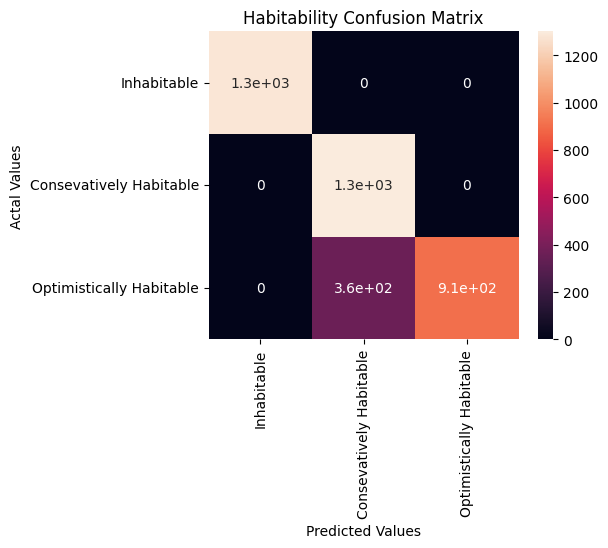

Decision Tree classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       0.78      1.00      0.88      1301
           2       1.00      0.72      0.83      1267

    accuracy                           0.91      3852
   macro avg       0.93      0.91      0.90      3852
weighted avg       0.93      0.91      0.90      3852



In [79]:
#Decision Tree - Classification

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
dtree_model = DecisionTreeClassifier(splitter = 'random', 
                                     max_depth = 6,
                                     random_state = 0, 
                                     max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
dtree_predictions = dtree_model.predict(X_test)

#Calculate the time taken for further comparison
dtree_time = time.time() - t0

#Store accuracy for final model comparison
dtree_accuracy = accuracy_score(y_test, dtree_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, dtree_predictions)

#Classification Report
print(f"Decision Tree classification Report:\n")
print(classification_report(y_test, dtree_predictions))

del confusion_mat
del t0

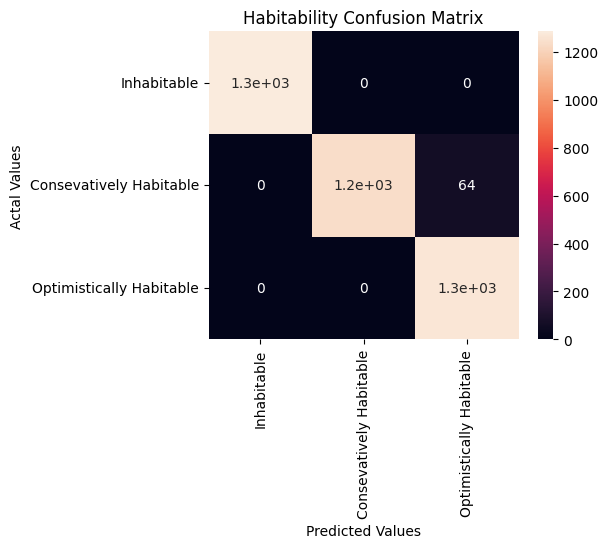

KNN classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.95      0.97      1301
           2       0.95      1.00      0.98      1267

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      3852



In [80]:
#KNN classifier - Classification
from sklearn.neighbors import KNeighborsClassifier

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

#Test the model
knn_predictions = knn_model.predict(X_test)

#Calculate the time taken for further comparison
knn_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
knn_accuracy = accuracy_score(y_test, knn_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, knn_predictions)

#Classification Report
print(f"KNN classification Report:\n")
print(classification_report(y_test, knn_predictions))

del confusion_mat
del t0


Gradient Boosting is a boosting classification that attempts to build a stronger classifier using the weaker ones. The idea is to predict the class of a data point and compare it to the actual class, then pass the error, if any, as feedback to the model; then the model uses this feedback to find the gradient and lessen the error rate by changing the parameters. After that, the training is done again. Gradient Boosting has some tree-specific parameters, which affect each tree in the model, namely, max_depth, max_leaf_nodes, min_samples_split, etc. I will use the previously calculated tree specific hyper-parameters, and will use GridSearchCV to find n_estimators and criterion.

In [81]:
#Gradient Boosting classification  
#GridSearchCV
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Find the best parameters for Gradient Boosting using GridSearchCV
#Hyperparameters' range

param_grid = {'criterion': ['friedman_mse',  'mse'],
              'n_estimators': np.arange(10, 100, 10)}

#Conduct the Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(), 
                           param_grid = param_grid,
                           refit = True, verbose = 1)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': np.int64(50)}


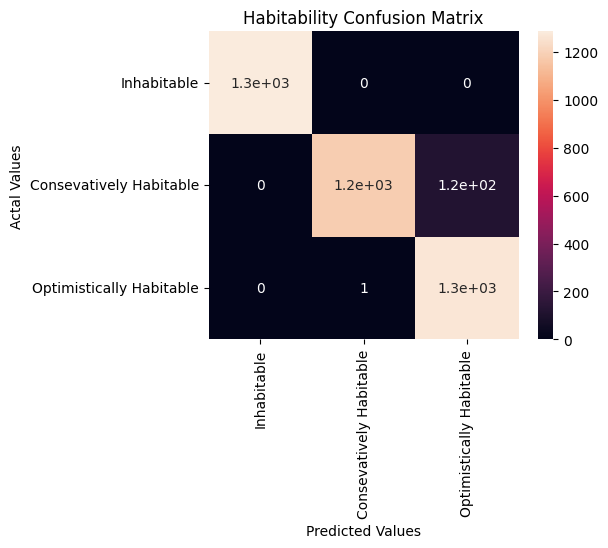

Gradient Boosting classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.91      0.95      1301
           2       0.91      1.00      0.95      1267

    accuracy                           0.97      3852
   macro avg       0.97      0.97      0.97      3852
weighted avg       0.97      0.97      0.97      3852



In [82]:
#Gradient Boosting - Classification

from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
gb_model = GradientBoostingClassifier(
    loss='log_loss',  # 'deviance' is deprecated, use 'log_loss'
    n_estimators=10,
    criterion='friedman_mse',
    max_depth=6,
    random_state=0,
    max_leaf_nodes=12
).fit(X_train, y_train)

#Test the model
gb_predictions = gb_model.predict(X_test)

#Calculate the time taken for further comparison
gb_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
gb_accuracy = accuracy_score(y_test, gb_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, gb_predictions)

#Classification Report
print(f"Gradient Boosting classification Report:\n")
print(classification_report(y_test, gb_predictions))

del confusion_mat

In [83]:
#Plot Classification log function
def plot_model_log(log):

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax1.set_title('Accuracy and Time taken', fontsize = 13)
    color = 'tab:green'
    ax1.set_xlabel('Classifier', fontsize = 13)
    ax1.set_ylabel('Time taken', fontsize = 13, color = color)
    ax2 = sns.barplot(x = 'Classifier', y = 'Time taken', data = log, palette = 'summer')
    ax1.tick_params(axis = 'y')
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', fontsize = 13, color = color)
    ax2 = sns.lineplot(x = 'Classifier', y = 'Accuracy', data = log, sort = False, color = color)
    ax2.tick_params(axis = 'y', color = color)

          Classifier  Accuracy  Time taken
0      Decision Tree  0.906802    0.014583
1                KNN  0.983385    0.071480
2  Gradient Boosting  0.968847    0.433748


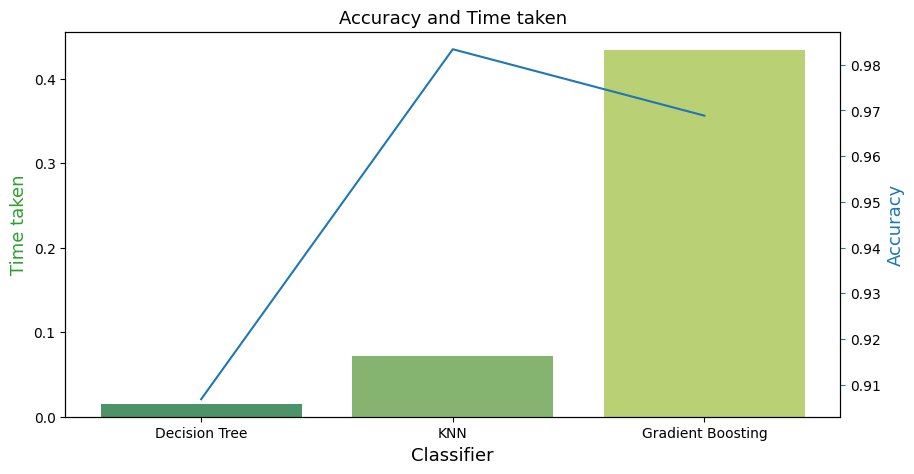

In [84]:
### MODEL COMPARISON
#Create a log of all classifiers : Accuracy and Time

#Make a list of accuracies
accuracy_list = [dtree_accuracy, knn_accuracy, gb_accuracy]

#Make a list of times
time_list = [dtree_time, knn_time, gb_time]

log_data = {'Classifier': ['Decision Tree','KNN','Gradient Boosting'],
              'Accuracy': accuracy_list,
              'Time taken': time_list}
clf_log = pd.DataFrame(log_data)
    
#Plot the log
plot_model_log(clf_log)
print(clf_log)